In [ ]:
# This reads in contrast curve and PSF profile info for making a plot

# Created 2020 June 5 by E.S.

In [14]:
import glob
import numpy as np
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
from astropy.io import fits

#%matplotlib inline
%matplotlib qt

In [10]:
# make list of all the files

lambda_over_D = pd.read_csv("./data/modern_contrast_curve.csv")
lambda_over_B = pd.read_csv("./data/lambda_B_cc.csv")
psf_profiles = pd.read_csv("./data/example_psf_profiles.csv", index_col=0)

In [11]:
psf_profiles_rad_asec = 0.0107*np.arange(-0.5*len(psf_profiles["x_xsec_1"]),0.5*len(psf_profiles["x_xsec_1"]),step=1)

In [15]:
# loop over all keys
for label, content in psf_profiles.items():
    plt.plot(psf_profiles_rad_asec,-2.5*np.log10(np.divide(content,6e4)), alpha = 0.2, color="gray")

plt.plot(lambda_over_D["rad_asec"],lambda_over_D["del_m_modern"],linewidth=4,
         label="$\lambda /D$ regime, based on fake planet injections")
plt.plot(lambda_over_B["x"],lambda_over_B["y"],linewidth=4,
         label="$\lambda /B$ regime, based on KS test")
plt.gca().invert_yaxis()
plt.xlim([0,2.2])
plt.ylim([10,0])
plt.legend()
plt.ylabel("$\Delta$m")
plt.xlabel("Radius (arcsec)")
plt.show()

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nyumbani/an

In [12]:
for label, content in psf_profiles.items():
    print(label)
    print(np.nanmedian(-2.5*np.log10(np.divide(content,6e4))))

x_xsec_0
7.76398083473409
y_xsec_0
9.402867898078664
x_xsec_rot_0
8.166269545431089
y_xsec_rot_0
9.402864014928854
x_xsec_1
7.451882520978968
y_xsec_1
7.665307852582647
x_xsec_rot_1
7.800764708388454
y_xsec_rot_1
7.937611333039413
x_xsec_2
7.720185733809623
y_xsec_2
7.439138349491899
x_xsec_rot_2
7.750554045593984
y_xsec_rot_2
8.049388726306521
x_xsec_3
7.586619953887395
y_xsec_3
7.303975317847241
x_xsec_rot_3
8.02975085623368
y_xsec_rot_3
7.879779744206127
x_xsec_4
7.346975888743383
y_xsec_4
7.541469324013994
x_xsec_rot_4
7.8512899407205134
y_xsec_rot_4
7.727197639012645
x_xsec_5
7.541916211607925
y_xsec_5
7.913313757025998
x_xsec_rot_5
7.78127861265255
y_xsec_rot_5
8.09254757951646
x_xsec_6
7.7389215490609455
y_xsec_6
7.452520300147612
x_xsec_rot_6
7.697014833324828
y_xsec_rot_6
7.882308663759858
x_xsec_7
7.81720206184627
y_xsec_7
7.250551016980227
x_xsec_rot_7
7.758783576548021
y_xsec_rot_7
8.000627116397517
x_xsec_8
7.469748577767785
y_xsec_8
7.653613809113323
x_xsec_rot_8
7.787912

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
psf_profiles

,Unnamed: 0,x_xsec_0,y_xsec_0,x_xsec_rot_0,y_xsec_rot_0,x_xsec_1,y_xsec_1,x_xsec_rot_1,y_xsec_rot_1,x_xsec_2,...,x_xsec_rot_7,y_xsec_rot_7,x_xsec_8,y_xsec_8,x_xsec_rot_8,y_xsec_rot_8,x_xsec_9,y_xsec_9,x_xsec_rot_9,y_xsec_rot_9
0,0,20.112785,10.399300,-0.025271,0.861247,34.013489,0.000000,48.646019,2.397256e-37,25.630777,...,47.545959,14.218453,-6.900077,-0.000000,26.234282,1.973800e-38,47.452534,-0.000000,11.081996,2.830553e-40
1,1,-4.431450,10.399300,-0.025271,0.861240,-41.402248,-0.000000,-5.060207,-7.868150e-37,17.661730,...,-52.472645,-48.403275,-47.639702,0.000000,30.603003,-7.109258e-38,9.311171,0.000000,78.560226,-8.068705e-40
2,2,4.176134,10.399300,-0.025271,0.861242,-16.757086,0.000000,-8.873444,3.489558e-37,-117.355690,...,-11.003437,-3.345363,5.119546,-0.000000,9.771111,9.321097e-38,-44.887791,-0.000000,10.982141,-1.980461e-39
3,3,-13.090706,10.399300,-0.025271,0.861244,-83.108635,-0.000000,-15.970494,-5.485946e-38,-176.140778,...,5.991477,25.087841,13.568602,0.000000,-22.591288,4.480090e-38,40.332623,0.000000,1.344594,-3.417666e-39
4,4,-27.002457,10.399300,-0.025271,0.861244,-122.994926,0.000000,30.670998,-1.691525e-36,-73.433762,...,57.672176,-25.065912,-39.023911,-0.000000,2.153612,-1.478754e-37,7.363212,-0.000000,-20.045504,6.699601e-38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,-2.426433,2.608424,28.141283,-85.399742,140.094086,60.047131,-5.946687,4.905207e+01,80.678612,...,16.348726,1.199187,-90.397758,147.416672,25.277615,2.531457e+00,19.750610,0.387285,-2.731793,3.442127e+01
402,402,0.649356,-0.698198,2.853215,-60.828876,110.804092,-2.856773,-2.677636,9.437828e+01,70.933365,...,-3.610636,-24.202801,89.461388,-98.939064,-17.083607,-2.625173e+00,-123.993233,43.392151,-36.876556,-2.032647e+01
403,403,-0.170992,0.184370,-85.184418,11.054420,-17.575222,15.893069,-5.939586,3.272104e+01,2.805733,...,-51.572216,-59.972816,254.393799,29.502298,-45.629196,-2.419356e+01,-23.842299,33.010944,43.334621,-3.821622e-01
404,404,0.034611,-0.039280,-54.660381,13.906630,-3.238571,-23.533468,63.821991,7.292332e+01,-40.953411,...,-31.738867,25.016268,107.282578,48.398098,-27.636395,1.673527e+00,39.172348,13.733778,-38.832226,-4.241852e+01


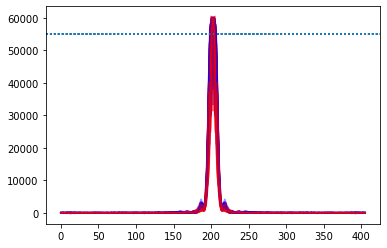

In [15]:
# read in each file, take a profile

profiles_df = pd.DataFrame()

for t in range(0,len(file_list)):

    sciImg, header = fits.getdata(file_list[t],0,header=True)
    
    # take a profile in x and y
    x_xsec = sciImg[int(0.5*np.shape(sciImg)[1]),:]
    y_xsec = sciImg[:,int(0.5*np.shape(sciImg)[0])]
    
    # rotate
    sciImg_rotated = ndimage.rotate(sciImg, angle=30, reshape=False)
    x_xsec_rot = sciImg_rotated[int(0.5*np.shape(sciImg_rotated)[1]),:]
    y_xsec_rot = sciImg_rotated[:,int(0.5*np.shape(sciImg_rotated)[0])]
    
    plt.plot(x_xsec, color = "b", alpha = 0.4)
    plt.plot(y_xsec, color = "b", alpha = 0.4)
    
    # now plot the mirror images, so that we can cut off the left half of the plot downstream
    plt.plot(np.flip(x_xsec), color = "b", alpha = 0.4)
    plt.plot(np.flip(y_xsec), color = "b", alpha = 0.4)
    
    # do the same with rotated PSFs
    plt.plot(x_xsec_rot, color = "r", alpha = 0.4)
    plt.plot(y_xsec_rot, color = "r", alpha = 0.4)
    plt.plot(np.flip(x_xsec_rot), color = "r", alpha = 0.4)
    plt.plot(np.flip(y_xsec_rot), color = "r", alpha = 0.4)
    
    # line above which PSFs are masked and reconstructed
    plt.axhline(y=55000, linestyle=":")
    
    # update profiles_df with only the right-hand side of the plotted data
    profiles_df["x_xsec_"+str(int(t))] = x_xsec.astype(float)
    profiles_df["y_xsec_"+str(int(t))] = y_xsec.astype(float)
    profiles_df["x_xsec_rot_"+str(int(t))] = x_xsec_rot.astype(float)
    profiles_df["y_xsec_rot_"+str(int(t))] = y_xsec_rot.astype(float)

# write out profiles
profiles_df.to_csv("junk.csv")

plt.show()

In [16]:
len(x_xsec_rot)

406

In [17]:
profiles_df

,x_xsec_0,y_xsec_0,x_xsec_rot_0,y_xsec_rot_0,x_xsec_1,y_xsec_1,x_xsec_rot_1,y_xsec_rot_1,x_xsec_2,y_xsec_2,...,x_xsec_rot_7,y_xsec_rot_7,x_xsec_8,y_xsec_8,x_xsec_rot_8,y_xsec_rot_8,x_xsec_9,y_xsec_9,x_xsec_rot_9,y_xsec_rot_9
0,20.112785,10.399300,-0.025271,0.861247,34.013489,0.000000,48.646019,2.397256e-37,25.630777,0.000000,...,47.545959,14.218453,-6.900077,-0.000000,26.234282,1.973800e-38,47.452534,-0.000000,11.081996,2.830553e-40
1,-4.431450,10.399300,-0.025271,0.861240,-41.402248,-0.000000,-5.060207,-7.868150e-37,17.661730,-0.000000,...,-52.472645,-48.403275,-47.639702,0.000000,30.603003,-7.109258e-38,9.311171,0.000000,78.560226,-8.068705e-40
2,4.176134,10.399300,-0.025271,0.861242,-16.757086,0.000000,-8.873444,3.489558e-37,-117.355690,0.000000,...,-11.003437,-3.345363,5.119546,-0.000000,9.771111,9.321097e-38,-44.887791,-0.000000,10.982141,-1.980461e-39
3,-13.090706,10.399300,-0.025271,0.861244,-83.108635,-0.000000,-15.970494,-5.485946e-38,-176.140778,-0.000000,...,5.991477,25.087841,13.568602,0.000000,-22.591288,4.480090e-38,40.332623,0.000000,1.344594,-3.417666e-39
4,-27.002457,10.399300,-0.025271,0.861244,-122.994926,0.000000,30.670998,-1.691525e-36,-73.433762,0.000000,...,57.672176,-25.065912,-39.023911,-0.000000,2.153612,-1.478754e-37,7.363212,-0.000000,-20.045504,6.699601e-38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,-2.426433,2.608424,28.141283,-85.399742,140.094086,60.047131,-5.946687,4.905207e+01,80.678612,55.717438,...,16.348726,1.199187,-90.397758,147.416672,25.277615,2.531457e+00,19.750610,0.387285,-2.731793,3.442127e+01
402,0.649356,-0.698198,2.853215,-60.828876,110.804092,-2.856773,-2.677636,9.437828e+01,70.933365,-30.866598,...,-3.610636,-24.202801,89.461388,-98.939064,-17.083607,-2.625173e+00,-123.993233,43.392151,-36.876556,-2.032647e+01
403,-0.170992,0.184370,-85.184418,11.054420,-17.575222,15.893069,-5.939586,3.272104e+01,2.805733,-2.565271,...,-51.572216,-59.972816,254.393799,29.502298,-45.629196,-2.419356e+01,-23.842299,33.010944,43.334621,-3.821622e-01
404,0.034611,-0.039280,-54.660381,13.906630,-3.238571,-23.533468,63.821991,7.292332e+01,-40.953411,62.798019,...,-31.738867,25.016268,107.282578,48.398098,-27.636395,1.673527e+00,39.172348,13.733778,-38.832226,-4.241852e+01
